In [1]:
import numpy as np
import pandas as pd
import re

In [3]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [7]:
df.duplicated().sum()

122

In [11]:
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

**1.** **areaWithType**

In [15]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3194,1.93,2285.0,Super Built up area 2285(212.28 sq.m.)
876,1.20,1620.0,Carpet area: 180 (150.5 sq.m.)
1736,0.90,1259.0,Built Up area: 1259 (116.96 sq.m.)
12,0.39,700.0,Super Built up area 700(65.03 sq.m.)Carpet area: 450 sq.ft. (41.81 sq.m.)
3700,1.20,1444.0,Super Built up area 1444(134.15 sq.m.)


In [18]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [20]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [22]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [24]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [26]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3637,3.1,flat,2491.0,Super Built up area 2491(231.42 sq.m.)Built Up area: 2450 sq.ft. (227.61 sq.m.)Carpet area: 2250 sq.ft. (209.03 sq.m.),2491.0,2450.0,2250.0
226,0.3,flat,748.0,Built Up area: 743 (69.03 sq.m.)Carpet area: 621 sq.ft. (57.69 sq.m.),NaN,743.0,621.0
2359,1.9,flat,1267.0,Super Built up area 1261(117.15 sq.m.),1261.0,NaN,NaN
601,1.1,flat,1103.0,Built Up area: 1103 (102.47 sq.m.),NaN,1103.0,NaN
2413,1.4,flat,1538.0,Super Built up area 1538(142.88 sq.m.),1538.0,NaN,NaN


In [28]:
df.duplicated().sum()

122

In [30]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [32]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.50,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
9,3.25,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
14,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
18,5.30,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
24,0.90,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN


In [34]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [36]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [38]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.50,house,360.0,Plot area 40(33.45 sq.m.),NaN,NaN,NaN
9,3.25,house,2250.0,Plot area 250(209.03 sq.m.),NaN,NaN,NaN
14,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
18,5.30,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
24,0.90,house,900.0,Plot area 900(83.61 sq.m.),NaN,NaN,NaN


In [40]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [42]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [44]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [46]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.50,house,360.0,Plot area 40(33.45 sq.m.),NaN,40.00,NaN
9,3.25,house,2250.0,Plot area 250(209.03 sq.m.),NaN,250.00,NaN
14,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
18,5.30,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
24,0.90,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
27,11.00,house,3096.0,Plot area 344(287.63 sq.m.),NaN,344.00,NaN
38,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
58,0.82,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
60,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN
62,19.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN


In [48]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [50]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [52]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,0.50,house,360.0,Plot area 40(33.45 sq.m.),NaN,360.00,NaN
9,3.25,house,2250.0,Plot area 250(209.03 sq.m.),NaN,2250.00,NaN
14,6.00,house,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.00,NaN
18,5.30,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
24,0.90,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN
27,11.00,house,3096.0,Plot area 344(287.63 sq.m.),NaN,3096.00,NaN
38,0.47,house,587.0,Plot area 624(57.97 sq.m.),NaN,624.00,NaN
58,0.82,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
60,3.00,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.00,NaN
62,19.00,house,4518.0,Plot area 502(419.74 sq.m.),NaN,4518.00,NaN


In [54]:
# update the original dataframe
df.update(all_nan_df)

In [56]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [58]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,not available,3.0,NaN,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental Care', 'GH Gurgaon', 'Chiranjiv Hospital', 'Kharbanda Maternity and Nursing Home', 'M.S Hospital', 'Dentecare - Multispeciality Dental Clinic', 'M Goel Hospital', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Pearl Dental Clinic', 'Jackson Hospital', 'Triveni Hospital Gurgaon', 'My Care Clinic', 'Sarvodya Hospital', 'Taneja Hospital', 'Dr. Ashok Jain', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Dental Health Centre', 'Swastik Maternity and Medical Centre', 'Gupta Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Sindhu Clinic', 'Dr. Ajay S. Gupta Clinic', 'Dr. Madan Clinic', 'Dev Man Kathuria Clinic', 'Satyam Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Rang Parivartan', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN
1,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),4,4,3,others,8.0,West,1 to 5 Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2400.0,NaN,2100.0
2,flat,pareena laxmi apartments,sector 99a,0.31,5904.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,2,not available,6.0,East,0 to 1 Year Old,"['Dwarka Expy', 'Govt. Sr. Sec. School', 'Excellere World School', 'Shani Mandir', 'PHC Garhi Harsaru', 'Alfaa Health Care Hospital', 'Corporation Bank', 'Axis Bank', 'KFG Sports Club', 'Basai Dhankot Railway Station', 'Grofers India Pvt. Ltd.', 'Rangmanch Farms', 'MCC Cricket Stadium', 'Indian Oil Petrol Pump', 'NSK Sports Academy']",NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'L

**2.additionalRoom**

In [63]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [65]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [67]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2947,"pooja room,study room,servant room",1,1,0,1,0
1330,study room,1,0,0,0,0
190,servant room,0,1,0,0,0
1774,not available,0,0,0,0,0
2705,not available,0,0,0,0,0


In [69]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,not available,3.0,NaN,10+ Year Old,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental Care', 'GH Gurgaon', 'Chiranjiv Hospital', 'Kharbanda Maternity and Nursing Home', 'M.S Hospital', 'Dentecare - Multispeciality Dental Clinic', 'M Goel Hospital', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Pearl Dental Clinic', 'Jackson Hospital', 'Triveni Hospital Gurgaon', 'My Care Clinic', 'Sarvodya Hospital', 'Taneja Hospital', 'Dr. Ashok Jain', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Dental Health Centre', 'Swastik Maternity and Medical Centre', 'Gupta Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Sindhu Clinic', 'Dr. Ajay S. Gupta Clinic', 'Dr. Madan Clinic', 'Dev Man Kathuria Clinic', 'Satyam Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Rang Parivartan', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN,0,0,0,0,0
1,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),4,4,3,others,8.0,West,1 to 5 Year Old,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2400.0,NaN,2100.0,0,0,0,0,1
2,flat,pareena laxmi apartments,sector 99a,0.31,5904.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,2,not available,6.0,East,0 to 1 Year Old,"['Dwarka Expy', 'Govt. Sr. Sec. School', 'Excellere World School', 'Shani Mandir', 'PHC Garhi Harsaru', 'Alfaa Health Care Hospital', 'Corporation Bank', 'Axis Bank', 'KFG Sports Club', 'Basai Dhankot Railway Station', 'Grofers India Pvt. Ltd.', 'Rangmanch Farms', 'MCC Cricket Stadium', 'Indian Oil Petrol Pump', 'NSK Sports Aca

**3.agePossession**

In [72]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Dec 2025                 7
Aug 2023                 7
Jun 2024                 7
Nov 2023                 5
By 2025                  4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
Aug 2024                 4
May 2024                 3
Nov 2024                 3
Jan 2025                 3
Feb 2024                 3
Jun 2027                 2
Jul 2025                 2
Dec 2026                 2
Sep 2025                 2
Oct 2025                 2
Jan 2026                 2
Mar 2025                 2
Jul 2027                 2
Aug 2025      

In [74]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [76]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [78]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,not available,3.0,NaN,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental Care', 'GH Gurgaon', 'Chiranjiv Hospital', 'Kharbanda Maternity and Nursing Home', 'M.S Hospital', 'Dentecare - Multispeciality Dental Clinic', 'M Goel Hospital', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Pearl Dental Clinic', 'Jackson Hospital', 'Triveni Hospital Gurgaon', 'My Care Clinic', 'Sarvodya Hospital', 'Taneja Hospital', 'Dr. Ashok Jain', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Dental Health Centre', 'Swastik Maternity and Medical Centre', 'Gupta Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Sindhu Clinic', 'Dr. Ajay S. Gupta Clinic', 'Dr. Madan Clinic', 'Dev Man Kathuria Clinic', 'Satyam Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Rang Parivartan', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN,0,0,0,0,0
1,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),4,4,3,others,8.0,West,Relatively New,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2400.0,NaN,2100.0,0,0,0,0,1
2,flat,pareena laxmi apartments,sector 99a,0.31,5904.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,2,not available,6.0,East,New Property,"['Dwarka Expy', 'Govt. Sr. Sec. School', 'Excellere World School', 'Shani Mandir', 'PHC Garhi Harsaru', 'Alfaa Health Care Hospital', 'Corporation Bank', 'Axis Bank', 'KFG Sports Club', 'Basai Dhankot Railway Station', 'Grofers India Pvt. Ltd.', 'Rangmanch Farms', 'MCC Cricket Stadium', 'Indian Oil Petrol Pump', 'NSK Sports Academy

**4.furnishDetails**

In [83]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
641,"['2 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
529,NaN,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
2496,NaN,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Lift(s)', 'Water purifier', 'Centrally Air Conditioned', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
61,NaN,"['Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"
2377,"['5 Fan', '1 Exhaust Fan', '3 Geyser', '24 Light', '1 Chimney', '1 Modular Kitchen', '4 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Low Density Society', 'Shopping Centre']"


In [85]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\saitarun\AppData\Local\Temp\ipykernel_26996\2445438592.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [87]:
furnishings_df.shape

(3803, 19)

In [89]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\saitarun\AppData\Local\Temp\ipykernel_26996\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [91]:
furnishings_df.sample(5)

,Light,Microwave,Geyser,Bed,Wardrobe,Fridge,Stove,Washing Machine,Modular Kitchen,AC,Chimney,Curtains,TV,Water Purifier,Dining Table,Exhaust Fan,Sofa,Fan
227,6,0,3,0,3,0,0,0,1,5,1,0,0,0,0,1,0,6
3721,8,0,1,0,2,0,0,0,1,0,1,1,0,0,0,1,0,3
1974,9,0,3,0,0,0,1,0,1,6,0,0,0,0,0,1,0,6
1393,26,0,4,1,0,0,0,0,0,8,0,0,0,0,0,1,0,7
3411,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [95]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [97]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

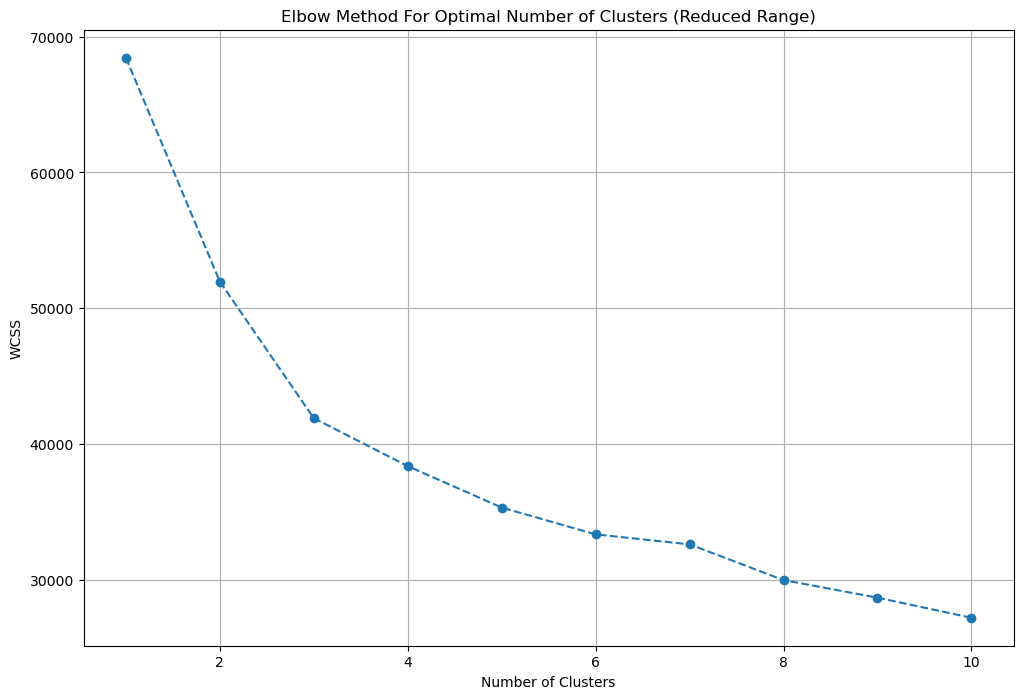

In [99]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [101]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [103]:
df = df.iloc[:,:-18]

In [105]:
df['furnishing_type'] = cluster_assignments

In [107]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2048,[],0
1721,"['6 Wardrobe', '1 Water Purifier', '12 Fan', '1 Exhaust Fan', '1 Dining Table', '6 Geyser', '18 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine']",2
1941,"['1 Water Purifier', '24 Fan', '1 Exhaust Fan', '21 Geyser', '1 Stove', '51 Light', '24 AC', '1 Modular Kitchen', '1 Chimney', '24 Wardrobe', '1 Microwave', 'No Bed', 'No Curtains', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']",1
223,"['1 Water Purifier', '4 Fan', '1 Fridge', '1 Exhaust Fan', '3 Geyser', '1 Stove', '8 Light', '5 AC', '1 Chimney', '4 Curtains', '1 Modular Kitchen', '3 Wardrobe', '1 Microwave', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV']",1
2069,"['4 Wardrobe', '6 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2


**5.features**

In [110]:
df[['society','features']].sample(5)

,society,features
2812,pyramid urban,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2819,tarc maceo,"['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
71,independent,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Low Density Society', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center']"
3752,paras dews,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1642,central park resorts,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [112]:
df['features'].isnull().sum()

635

In [114]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [116]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [118]:
temp_df = df[df['features'].isnull()]

In [120]:
temp_df.shape

(635, 26)

In [122]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [124]:
df.loc[temp_df.index,'features'] = x.values

In [126]:
df['features'].isnull().sum()

481

In [128]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [130]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [132]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3306,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2308,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2138,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [134]:
features_binary_df.shape

(3803, 130)

In [136]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

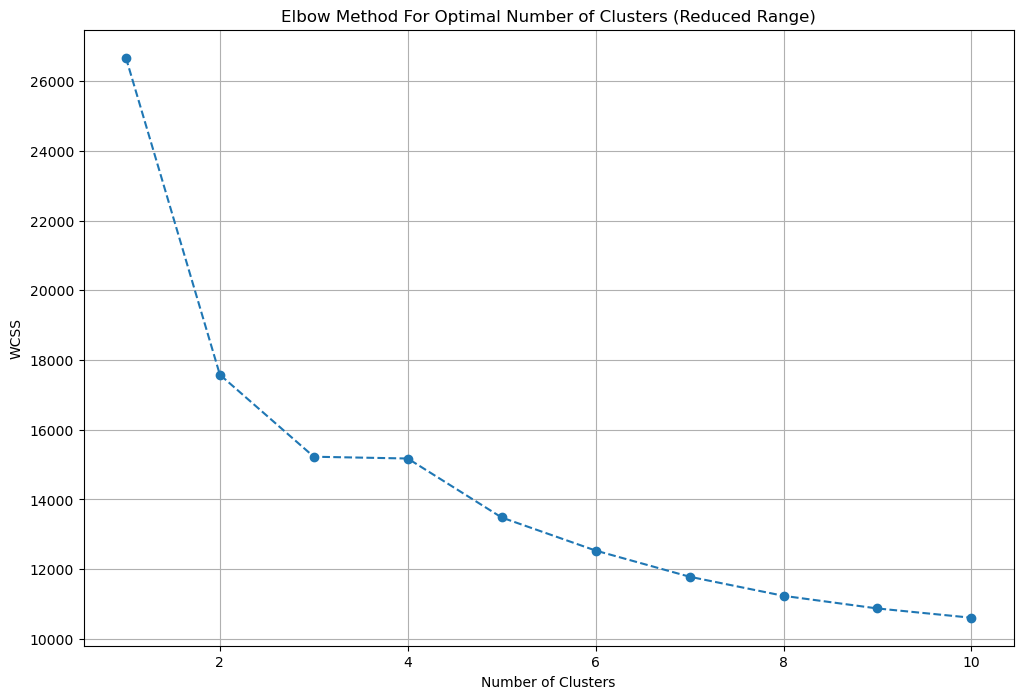

In [138]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [140]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [142]:
df['luxury_score'] = luxury_score

In [144]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 6,0.50,13889.0,360.0,Plot area 40(33.45 sq.m.),5,3,3,not available,3.0,NaN,Old Property,"['Chintapurni Mandir', 'Sheetla Mata Mandir', 'D.R. Rajnis Gupta Clinic', 'Aryan Hospital', 'Sparsh Hospital Gurgaon', 'Bhatnagar Maternity and Nursing Home', 'Ravi Clinic and Health Care Centre', 'Gurgaon Eye Centre', 'Geeta Nursing Home Gurgaon', 'Dr. Sarvejeet Singh', 'Dr. Agya Ram Sharma Clinic', 'Centre For Sight Gurgaon New Railway Road', 'Kidney Clinic', 'Bindal Clinic', 'Lalit Dental Care', 'GH Gurgaon', 'Chiranjiv Hospital', 'Kharbanda Maternity and Nursing Home', 'M.S Hospital', 'Dentecare - Multispeciality Dental Clinic', 'M Goel Hospital', 'Lall Eye Care Centre', 'Om Charitable Dental & Implant Centre', 'Lall Nursing and Maternity Home', 'Pearl Dental Clinic', 'Jackson Hospital', 'Triveni Hospital Gurgaon', 'My Care Clinic', 'Sarvodya Hospital', 'Taneja Hospital', 'Dr. Ashok Jain', 'Jain Sant Phool Chand Ji Charitable Hospital', 'Dental Health Centre', 'Swastik Maternity and Medical Centre', 'Gupta Hospital Gurgaon', 'Nova Care Clinic', 'Verma E.N.T. Hospital', 'Dr. Sindhu Clinic', 'Dr. Ajay S. Gupta Clinic', 'Dr. Madan Clinic', 'Dev Man Kathuria Clinic', 'Satyam Hospital Gurgaon', 'Rajiv Memorial Eye Infirmary Jacobpura', 'State bank of india', 'Hdfc bank', 'Kotak bank', 'Rang Parivartan', 'Pizza Hut', 'St. Michaels Sr. Sec. School', 'Dronacharya Government College']","['1 Wardrobe', '3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,360.0,NaN,0,0,0,0,0,0,[],0
1,flat,the lions cghs,sector 56,2.00,8333.0,2400.0,Super Built up area 2400(222.97 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.),4,4,3,others,8.0,West,Relatively New,"['Sector metro station', 'Sector metro station', 'Sector 54 chowk metro station', 'Sanatan Dharm Mandir', 'Radhakrishna Shani Mandir', 'State bank ATM', 'Icici bank ATM', 'Icici bank ATM', 'Citi bank ATM', 'Indusind bank ATM', 'Surgicare Hospital Gurgaon', 'Kriti Hospital', 'Anand Hospital Gurgaon', 'pracksht hospital', 'Arunodaya Deseret Eye Hospital', 'HUDA Office Complex', 'Medisca', 'Apollo Pharmacy', 'Intellion Park', 'International Tech Park', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank and atm', 'State bank of india', 'Kotak mahindra bank', 'Indusind bank', 'Axis bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank & atm', 'Hdfc bank', '222', 'Pizza Hut', 'Wat-a-Burger', 'Burger Singh', 'Bikanerwala', 'Naivedyam Restaurant', 'Clock tower', 'Starbucks', ""Carl's Jr."", 'Cafe Tonini', 'Sagar Ratna', 'IILM', 'Iilm University', 'Sushant College of Arts & Architecture', 'Ansal Institute of Technology', 'Suncity School']","['4 Wardrobe', '5 Fan', '1 Exhaust Fan', '4 Geyser', '10 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",2400.0,NaN,2100.0,0,0,0,0,1,2,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
2,flat,pareena laxmi apartments,sector 99a,0.31,5904.0,525.0,Carpet area: 525 (48.77 sq.m.),2,2,2,not available,6.0,East,New Property,"['Dwarka Expy', 'Govt. Sr. Sec. School', 'Excellere World School', 'Shani Mandir', 'PHC Garhi Harsaru', 'Alfaa Health Care Hospital', 'Co

In [146]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [148]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
457,flat,ss the leaf,sector 85,1.25,7179.0,1741.0,Super Built up area 1741(161.74 sq.m.)Built Up area: 1730 sq.ft. (160.72 sq.m.)Carpet area: 1720 sq.ft. (159.79 sq.m.),2,2,3,10.0,South-East,Relatively New,1741.0,1730.0,1720.0,0,0,0,0,0,0,49
1377,flat,dlf the skycourt,sector 86,2.20,11500.0,1913.0,Super Built up area 1930(179.3 sq.m.),3,3,1,7.0,NaN,Relatively New,1930.0,NaN,NaN,0,0,0,1,0,1,77
1855,house,vipul tatvam villa,sector 48,7.25,27971.0,2592.0,Plot area 288(240.8 sq.m.),3,4,2,2.0,South,Moderately Old,NaN,2592.0,NaN,1,1,1,1,0,2,115
990,house,international city by sobha phase 2,sector 109,12.50,26667.0,4687.0,Plot area 500(418.06 sq.m.),5,6,3,3.0,East,Relatively New,NaN,4500.0,NaN,1,1,1,1,0,0,63
3793,flat,satya the hermitage,sector 103,1.12,5625.0,1991.0,Super Built up area 1991(184.97 sq.m.)Carpet area: 1500 sq.ft. (139.35 sq.m.),3,4,3+,9.0,NaN,New Property,1991.0,NaN,1500.0,0,1,0,0,0,0,49


In [150]:
df.shape

(3803, 23)

In [152]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)